## Predicting heart Disease using Machine Learning

This notebook looks into various Python based on Machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes


We' re going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Probelm Definiton

In a statement
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data cam from Cleveland Database from UCI MAchine Learning repository http://archive.ics.uci.edu/ml/datasets/Heart+Disease


There is also a version available on kaggle.https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you will get different information about each of the features in your data.
**Create a Data Dictionary**

*ageage in years
*sex(1 = male; 0 = female)
*cpchest pain type
    0.Typical angina: chest pain related decrease blood supply to the heart
    1. Atypical engima: chest pain not related to heart
    2. Non-anginal pain: typically esophageal spasms(non heart related)
    3. Asymtomatic: chest pain not showing signs of disease
*trestbpsresting blood pressure (in mm Hg on admission to the hospital)
*cholserum cholestoral in mg/dl
*fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*restecgresting electrocardiographic results
*thalachmaximum heart rate achieved
*exangexercise induced angina (1 = yes; 0 = no)
*oldpeakST depression induced by exercise relative to rest
*slopethe slope of the peak exercise ST segment
*canumber of major vessels (0-3) colored by flourosopy
*thal3 = normal; 6 = fixed defect; 7 = reversable defect
*target1 or 0

### Preapring the tools

We' re going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [104]:
## Import all the tools that we nee

## Regular EDA(Exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## We want our plots to appear inside the notebook
%matplotlib inline 

## Models from Scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [6]:
### Load Data

heart = pd.read_csv("data/Heart Disease.csv")
heart.shape

(303, 14)

## Data Exploration (exporatory data analysis or EDA)
The goal here is to find more about the data and become a subject matter expert on the dataset you're working with

1. What questions you are trying to solve
2. what kind of data do we have and how do we treat different data types?
3. what's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. how can you add, change or remove features to get more out of your data?

In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

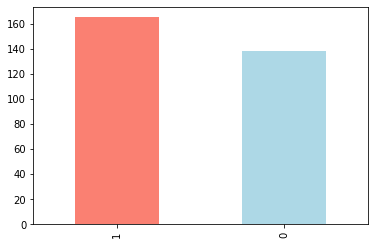

In [12]:
heart["target"].value_counts().plot(kind="bar", color =["salmon", "lightblue"]);

In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
## Are we missing any values
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [18]:
heart.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [20]:
### Compare traget column with sex Column
pd.crosstab(heart. target, heart.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

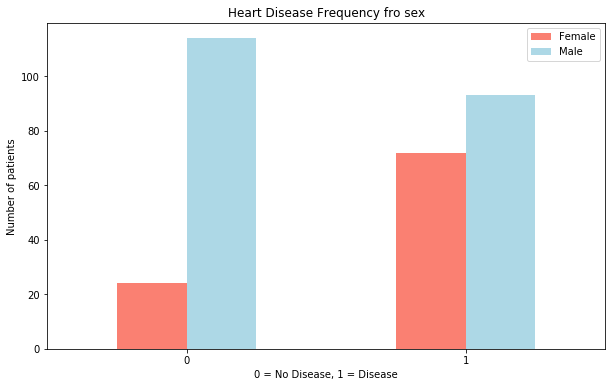

In [31]:
## create a plot of crosstab
pd.crosstab(heart.target, heart.sex).plot(kind ="bar", figsize=(10,6), color =["salmon", "lightblue"]);
plt.title("Heart Disease Frequency fro sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [32]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
heart["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max heart rate for heart disaese

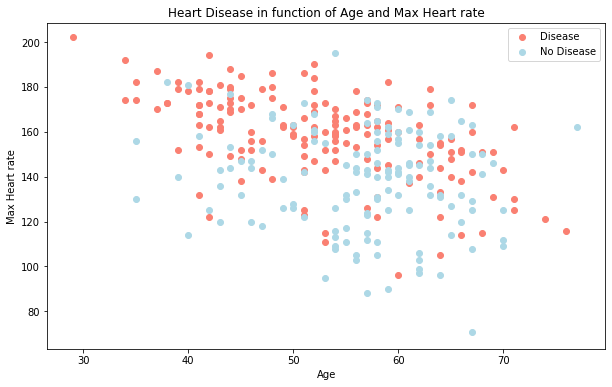

In [37]:
## Create a figure

plt.figure(figsize =(10,6))

## Scatter with positive examples

plt.scatter(heart.age[heart.target==1],
            heart.thalach[heart.target==1],
            c="salmon")
plt.scatter(heart.age[heart.target==0],
            heart.thalach[heart.target==0], c="lightblue")

## Add some helpful info

plt.title("Heart Disease in function of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No Disease"]);

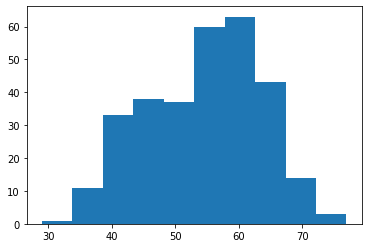

In [39]:
## Distribution of the age column with a histogram
plt.hist(heart.age);

### Compare Heart diesease Frequency per chestpain Type

3. Cp - chest pain type

*cpchest pain type
    0.Typical angina: chest pain related decrease blood supply to the heart
    1. Atypical engima: chest pain not related to heart
    2. Non-anginal pain: typically esophageal spasms(non heart related)
    3. Asymtomatic: chest pain not showing signs of disease

In [41]:
pd.crosstab(heart.cp, heart.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

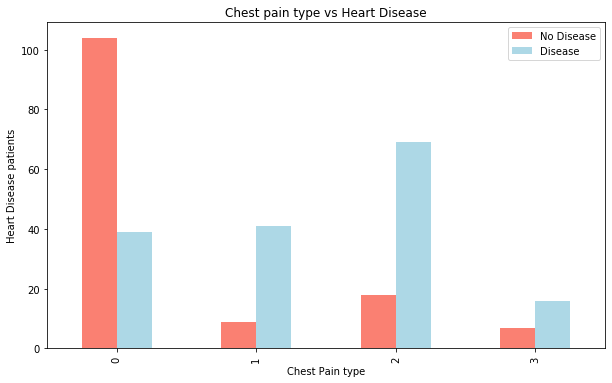

In [45]:
## Plotting the data

pd.crosstab(heart.cp, heart.target).plot(kind = "bar", color = ["salmon","lightblue"], figsize = (10,6))

## Add some communication

plt.title("Chest pain type vs Heart Disease")
plt.xlabel("Chest Pain type")
plt.ylabel("Heart Disease patients")
plt.legend(["No Disease", "Disease" ])
plt.xticks()

In [46]:
### Make a Correlation matrix 

heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


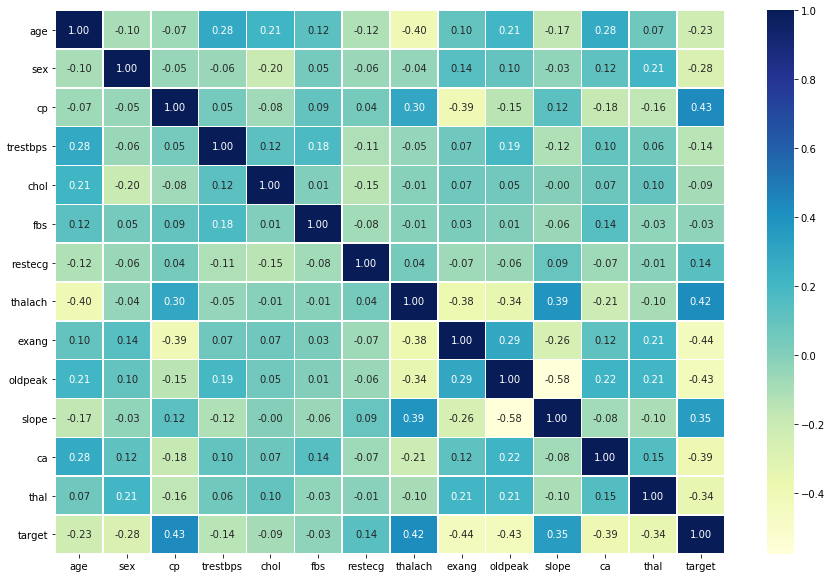

In [48]:
## Let's make our correlation matrix a little visual

corr_matrix = heart.corr()

fig,ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(corr_matrix, annot= True,
                 linewidths = 0.5,
                fmt=".2f",
                cmap = "YlGnBu");

### 5. Modelling

In [49]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
## Split data into X & Y
X = heart.drop("target", axis =1)
y = heart['target']

X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [51]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [53]:
# Split data into train and test set
np.random.seed(42)
## Split data into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [54]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [55]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

## Now we've our data split into training  and test sets, it's time to build our machine learning model

We'll train it (find patterns) on the training set
and we will test it (use the patters) on the test set

We're going to try three different machine learning models, K-nearest neighbors classifiers, RandomForest Classifier

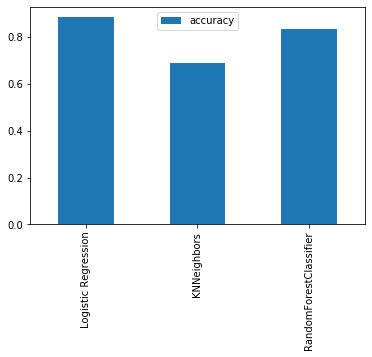

In [66]:
## Model Comparision

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model's first prediction aren't always what we should based our next steps off.
what should we do?

Let's look at the following:

* Hyper parameter tuning
* Feature importance
* Cross Validation
* Precision
* Recall
* F1 score
* classification_report
* ROC curve
* Area Under Curve(AUC)

## Hyperparameter tuning

In [68]:
# Let's tune KNN

train_scores = []
test_scores = []

## Create a list of different values for n_neighbors

neighbors = range(1,21)

## Set up KNN instance
knn = KNeighborsClassifier()

## Loop through different n_neigbhors:
for i in neighbors:
    knn.set_params(n_neighbors =i)
    ## Fit the algorithm
    knn.fit(X_train, y_train)
    
    ## Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    ## Update the test scores
    test_scores.append(knn.score(X_test, y_test))
    

In [69]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [70]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


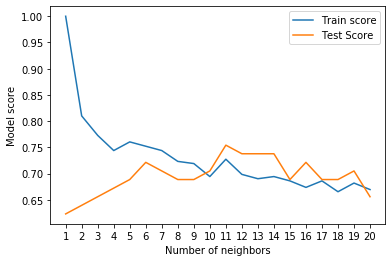

In [72]:
## Plotting the neighbors 

plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test Score" )
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21,1))
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyper parameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [79]:
## Create a hyperparameter grid for logistics regression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

## Create a hyper parameter grid for RandomForestClassifier

ran_grid = {"n_estimators":np.arange(10,1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyper parameter grids for each models, let's tune them using RandomizedSearchCV..

In [75]:
## Tune Lositic Regression

np.random.seed(42)

## Setup random hyperparameter dearch for Logisitic Regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter =20,
                                verbose =2)

## Fit random hyper parameter search model for Logistic Regression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ solver=liblinear, C=1.623776739188721, total=   0.0s
[CV] solver=liblinear, C=1.623776739188721 ...........................
[CV] ............ solver=liblinear, C=1.623776739188721, total=   0.0s
[CV] solver=liblinear, C=1.623776739188721 ...........................
[CV] ............ solver=liblinear, C=1.623776739188721, total=   0.0s
[CV] solver=liblinear, C=1.623776739188721 ...........................
[CV] ............ solver=liblinear, C=1.623776739188721, total=   0.0s
[CV] solver=liblinear, C=1.623776739188721 ...........................
[CV] ............ solver=liblinear, C=1.623776739188721, total=   0.0s
[CV] solver=liblinear, C=4.281332398719396 ...........................
[CV] ............ solver=liblinear, C=4.281332398719396, total=   0.0s
[CV] solver=liblinear, C=4.281332398719396 ...........................
[CV] ............ solver=liblinear, C=4.281332398719396, total=   0.0s
[CV] solver=liblinear, C=4.281332398719396 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [76]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [77]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [80]:
## Tune Hyper parameters for RandomForest Classifier

np.random.seed(42)

rs_reg = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions = ran_grid,
                            cv =5,
                            n_iter =20,
                            verbose=True)
rs_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   50.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [82]:
rs_reg.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [83]:
## Evaluate the Randomized Search Random Forest Classifier

rs_reg.score(X_test, y_test)

0.8688524590163934

In [84]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNNeighbors': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Hyperparameter Tuning with GRidSearchCV
Since our Logistic Regression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [86]:
##  Hyperparameter using Grid SearchCV

grid_2 = {"C": np.logspace(-4, 4, 30),
          "solver": ["liblinear"]}

## set up hyperparameter search for Logistic Regression

g_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = grid_2,
                         cv =5, verbose =True)

## Fit the hyperparameter search model

g_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [87]:
## check the best hyper parameters
g_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [89]:
## Evaluate the grid search CV Logistics Regression model

g_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned Machine learning classifier, beyond accuracy, 
* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* f1-score
and it would be great if cross validation was used where possible

To make comparisions and evaluate our trained model, first we need to make predictions



In [90]:
# Make predictions to the tuned model
y_preds = g_log_reg.predict(X_test)

In [91]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [92]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

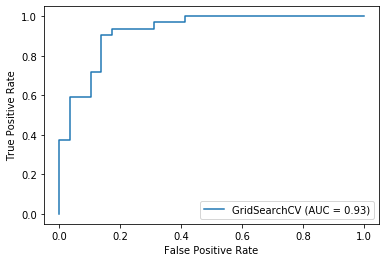

In [96]:
## plot ROC curve and calculate AUC metrics

plot_roc_curve(g_log_reg, X_test, y_test);



In [97]:
## Confusion matrix

conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [110]:
sns.set(font_scale =1.5)

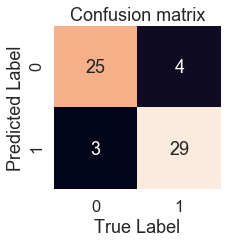

In [108]:
sns.set(font_scale=1.5)
def plot_conf_mat(conf_mat):
    """
    Plots the confusion matrix using seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(conf_mat, annot =True,
                     cbar =False)
    plt.title("Confusion matrix")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_mat(conf_mat)

Now we have got ROC curve, an AUC metric and Confusion metric. Let's get a classification report as well as cross validated precision or recall score

In [111]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation using cross-validation

We're going to calculate Accuracy, precision, recall and f-1 using cross_val_score

In [112]:
# Check best hyperparameters
g_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [113]:
## Create a new classfier with best parameters

clf = LogisticRegression(C= 0.20433597178569418, solver = 'liblinear')

In [116]:
## Cross Validated Accuracy
cv_acc = cross_val_score(clf, X, y, cv =5, scoring ="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [133]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [118]:
## Cross validated precision
cv_precision = cross_val_score(clf, X, y, cv =5, scoring = "precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [131]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [130]:
## Cross validated recall

cv_recall = cross_val_score(clf, 
                            X, 
                            y, 
                            cv=5, 
                            scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [121]:
## Cross validated f1

cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

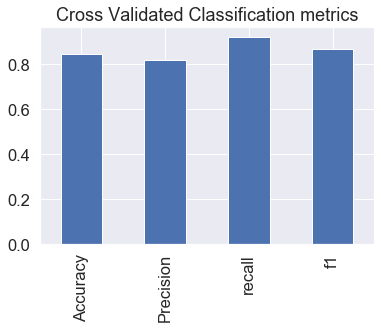

In [134]:
## Visualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "recall": cv_recall,
                           "f1": cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title= "Cross Validated Classification metrics",
                      legend=False);

## Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different machine learning model

Let's find feature importance for Logistic Regression model...

In [139]:
## Fit an instance of Logistic Regression

clf = LogisticRegression(C=0.20433597178569418,
                         solver = "liblinear")
clf.fit(X_train, y_train);

In [140]:
## Check Coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [142]:
## Match the features to columns

feature_dict =dict(zip(heart.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

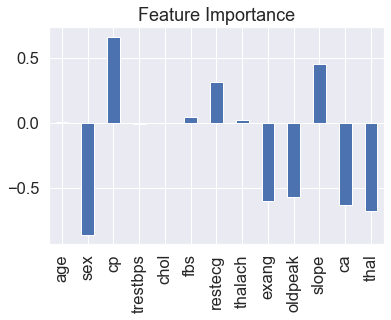

In [146]:
## Visualize using feature importance

feature_heart = pd.DataFrame(feature_dict, index=[0])
feature_heart.T.plot.bar(title= "Feature Importance", legend=False);

In [147]:
pd.crosstab(heart.sex, heart.target)

target,0,1
sex,,
0,24,72
1,114,93


In [149]:
pd.crosstab(heart.slope, heart.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet .... ask yourself ...

* Could you collect more data
* Could you try a better model? Catboost or XGboost
* Could we improve the current models?(beyond what we've done so far)
* If a model is good enough (you have hit your evalution metric how would you export it and share it with others?)
